# Logistic Regression : Direct Marketing in Banking

## 1. Introduction

This is an example on how to implement logistic regression to predict wheather a client will subscribe to a term deposit as a result of direct marketing campaigns (phone calls). The dataset if from the UIC Machine Learning Repository.  

This analysis was primarily motivated by the work done by Susan Li (https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

## 2. About Logistic Regression

Logistic regression is basically a machine learning classification algorithm used to predict the probability of a categorical dependent variable. Thus, it predicts P(Y=1) as a function of x. Note that the dependent variable is binary (0 or 1).

**Main Assumptions**

1. Independent variables should have no multicollinearity
2. Independent variables have a linear relationship to log odds 
3. Sample sizes are large

## 3. Code

Let us take a look at the code.

### 3.1 Setting the environment

Importing packages:
  

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

### 3.2 Importing data & Inspection

Let us import the data and inspect the same  

In [3]:
## Importing the data (in CSV format)
data = pd.read_csv('banking.csv', header = 0)

## Understanding the data
data = data.dropna() ##Dropping NA fields

print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
## Inspecting the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### 3.3 Understanding the data in hand

#### 3.3.1 Input variables

1.age (numeric)  
2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)  
3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)  
4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)  
5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)  
6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)  
7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)  
8.contact: contact communication type (categorical: “cellular”, “telephone”)  
9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)  
10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)  
11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model  
12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14.previous: number of contacts performed before this campaign and for this client (numeric)  
15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)  
16.emp.var.rate: employment variation rate — (numeric)  
17.cons.price.idx: consumer price index — (numeric)  
18.cons.conf.idx: consumer confidence index — (numeric)  
19.euribor3m: euribor 3 month rate — (numeric)  
20.nr.employed: number of employees — (numeric)  

#### 3.3.2 Target Variable  

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

#### 3.3.3 Bucketing : Education

Education has many categories. We are going to reduce it for better modeling. 

In [5]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
## Grouping basic - 4,6 and 9 years into basic

data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [7]:
## Looking at the education field again

data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### 3.4 Exploratory Data Analysis

#### 3.4.1 Target Variable

Let us understand the target variable first

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

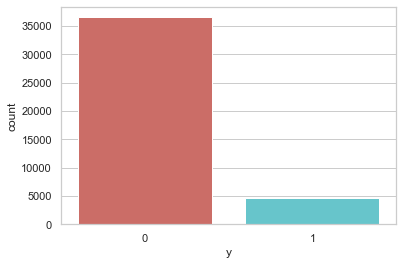

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

Thus we have 36548 cases of 'no success', and '4640' cases of success.

Let us understand how the mean values are, for both the classes. 



In [10]:
## Data Summarization
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


** OBSERVATIONS: **

1. Average age of people who converted as higher than those who didn't
2. People who converted were engaged for a longer duration over the call
3. People who converted were exposed to fewer campaigns than those who didn't


### 3.4.2 Data Visualization

** 1. Purchase by job type **  

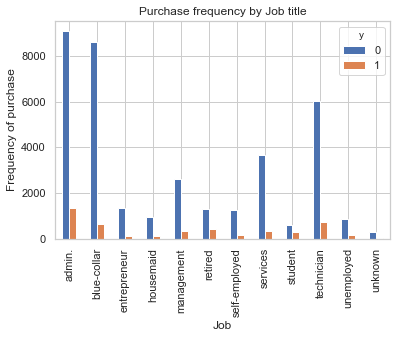

In [11]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase frequency by Job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_job')

Thus jobs seem to be an important predictor variable.

** 2. Purchase by marital status **


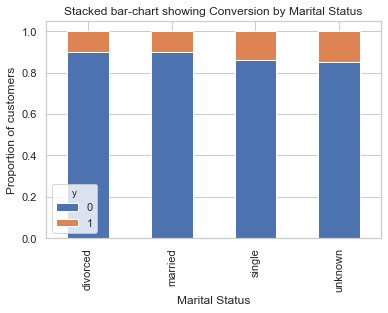

In [12]:
%matplotlib inline
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_ms')

THere is not variation within each of the classes, and hence doesnt seem to be an important predictor variable.

** 3. Purchase by education **

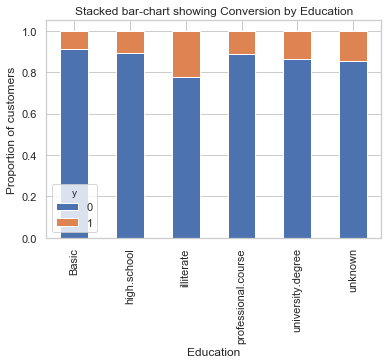

In [13]:
%matplotlib inline
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_edu')

Education seems to be important in predicting the success - illiterate people being convinced more by such marketing calls. 

** 4. Purchase quantity by Month **


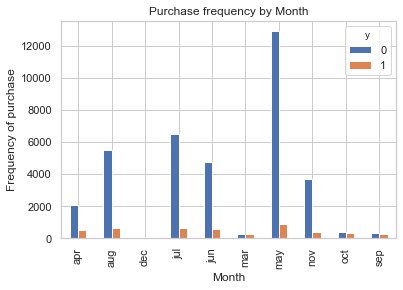

In [15]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_mnt')

The number of conversions seem to be seasonal, and months seem to play an important role.

** 5. Understanding the Day of Week effect **

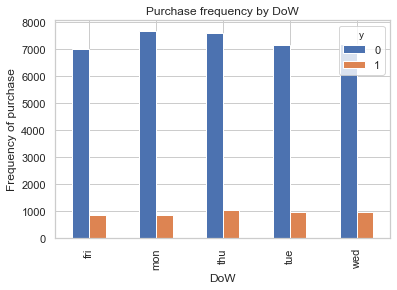

In [16]:
%matplotlib inline
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase frequency by DoW')
plt.xlabel('DoW')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_dow')

Thus Day of Week doen't seem to contain much information, and hence might not be a good predictor variable.

** 6. Purchase frequency by Previous outcomes**

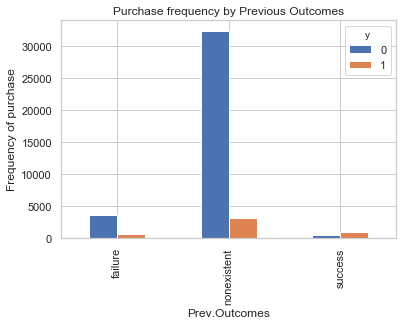

In [17]:
%matplotlib inline
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase frequency by Previous Outcomes')
plt.xlabel('Prev.Outcomes')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_pout')

Thus, new target customers seem to convert more. Also, previous outcomes seem to be an important variable in prediction.

### 3.5 Creating Dummy Variables

Since lot of fields are categorical, let us code them into dummy variables. These dummy variables contain binary values. 

In [18]:
categorical_variable_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in categorical_variable_cols:
    categ_list = 'var_' + var
    categ_list = pd.get_dummies(data[var],prefix = var)
    data1=data.join(categ_list)
    data = data1

## Creating feilds to keep
data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_variable_cols]

** Final columns to keep**

In [25]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

** Setting the X & Y values **

In [26]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
X = [i for i in data_final_vars if i not in y]

### 3.6 Feature Selection

For the purpose of feature selection, the method impletened here is **RFE (Recursive Feature Elimination)**.  

RFE selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a *coef_* attribute or through a *feature_importances_* attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [27]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,step = 18)

rfe = rfe.fit(data_final[X],data_final[y])

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

print(Selected_Features_Support)
print(Selected_Features_rank)

C:\Users\vulo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vulo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\vulo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[False, False, True, False, True, True, True, True, True, False, True, True, False, False, False, True, False, True, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, True, False, False, False, False, True, False, True, True, False, True, True]
[3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 2, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 3, 1, 1]


C:\Users\vulo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The RFE has helped us select the following features: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”, “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.

Selecting only these columns:

In [28]:
columns_final = ["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 

X = data_final[columns_final]
y = data_final['y']

### 3.7 Model Implementation

Running the final model with the selected features.

** Train vs Test : 70% vs 30%**

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


** Creating the final model : **

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

** Predicting the test set results, and calculating the accuracy**


In [31]:
y_pred = logreg.predict(X_test)

## Calculating the accuracy

print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.900461


### 3.8 Cross Validation to make sure that the model generalizes well

In-order to make sure that the model doesn't overfit, we will do a 10-fold CV to train our logistic regression model.

In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 10, random_state = 7, shuffle = True)

modelCV = LogisticRegression()

scoring = 'accuracy'

results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)

print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.897


Thus the average accuracy after CV is very close to the accuracy predicted from the test set. 

Hence, we can conclude that our model generalizes well. 
  
  
### 3.9 Creating the truth table (Confusion Matrix)  


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1121   255]]


Thus, True Positive = 10872, False Positive = 1122, True Negative = 254, False Negative = 109

Precision = TP/(TP+FP)  

Recall = TP/(TP+FN)  

F score = 2 * (Precision * Recall)/(Precision + Recall)

** Calculating Precission, Recall & F1 score**

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.70      0.19      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



Thus the model has a high overall precision and recall, and F-score.